In [8]:
import pandas as pd

# Load data
historical_df = pd.read_csv('/content/sample_data/historical_data.csv')
fear_greed_df = pd.read_csv('/content/sample_data/fear_greed_index.csv')


# Convert date columns
historical_df['Trade Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
fear_greed_df['Sentiment Date'] = pd.to_datetime(fear_greed_df['date'], format='%Y-%m-%d').dt.date

# Merge on date
merged_df = pd.merge(historical_df, fear_greed_df[['Sentiment Date', 'classification', 'value']],
                     left_on='Trade Date', right_on='Sentiment Date', how='left')

# Feature engineering
merged_df['Profitable'] = merged_df['Closed PnL'] > 0

# Group by sentiment
aggregated_by_sentiment = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Profitable': 'mean',
    'Size USD': 'mean',
    'Execution Price': 'mean'
}).rename(columns={
    'Closed PnL': 'Avg PnL',
    'Profitable': 'Win Rate',
    'Size USD': 'Avg Trade Size (USD)',
    'Execution Price': 'Avg Execution Price'
}).reset_index()

aggregated_by_sentiment['Win Rate'] = (aggregated_by_sentiment['Win Rate'] * 100).round(2)
aggregated_by_sentiment


,classification,Avg PnL,Win Rate,Avg Trade Size (USD),Avg Execution Price
0,Extreme Fear,34.537862,37.06,5349.731843,7054.795108
1,Extreme Greed,67.892861,46.49,3112.251565,6082.195865
2,Fear,54.290400,42.08,7816.109931,14152.620222
3,Greed,42.743559,38.48,5736.884375,13411.276344
4,Neutral,34.307718,39.70,4782.732661,12393.692779


/tmp/ipython-input-9-3289225989.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')
/tmp/ipython-input-9-3289225989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')
/tmp/ipython-input-9-3289225989.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')


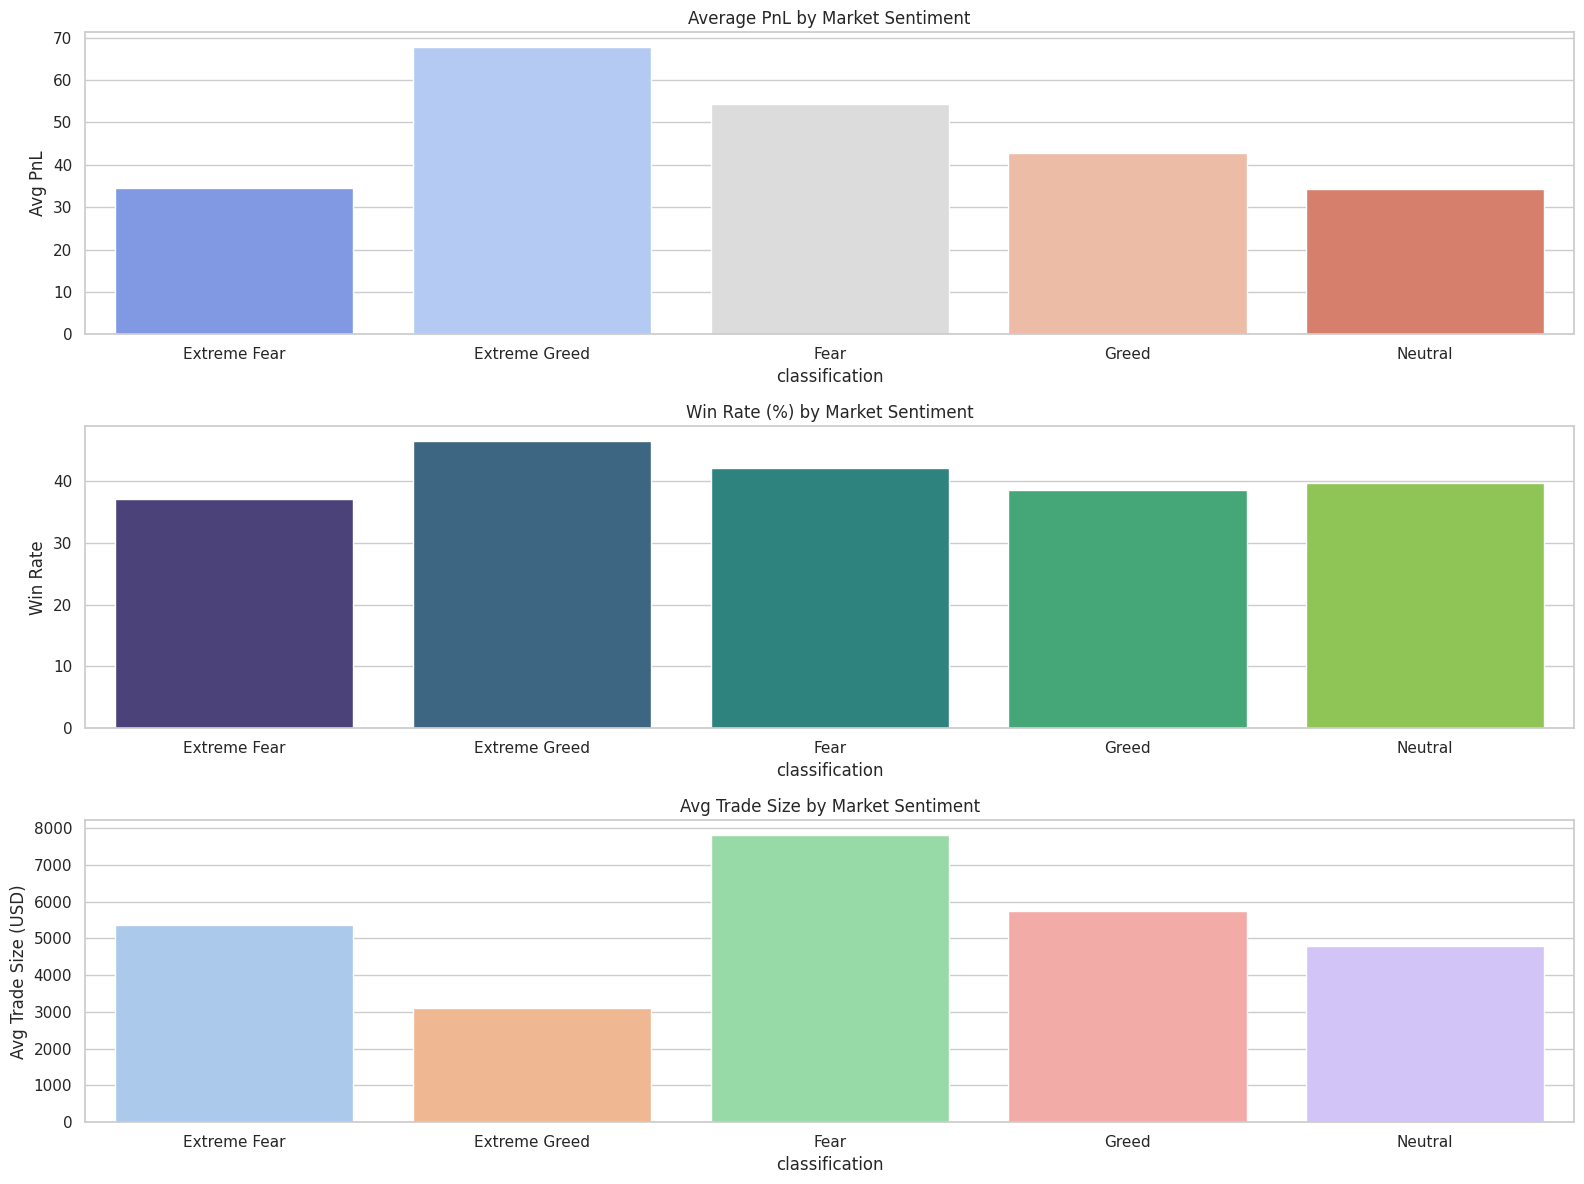

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plot 1: Average PnL
plt.subplot(3, 1, 1)
sns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')
plt.title('Average PnL by Market Sentiment')

# Plot 2: Win Rate
plt.subplot(3, 1, 2)
sns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')
plt.title('Win Rate (%) by Market Sentiment')

# Plot 3: Trade Size
plt.subplot(3, 1, 3)
sns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')
plt.title('Avg Trade Size by Market Sentiment')

plt.tight_layout()
plt.show()


/tmp/ipython-input-10-1187153813.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')
/tmp/ipython-input-10-1187153813.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')
/tmp/ipython-input-10-1187153813.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')


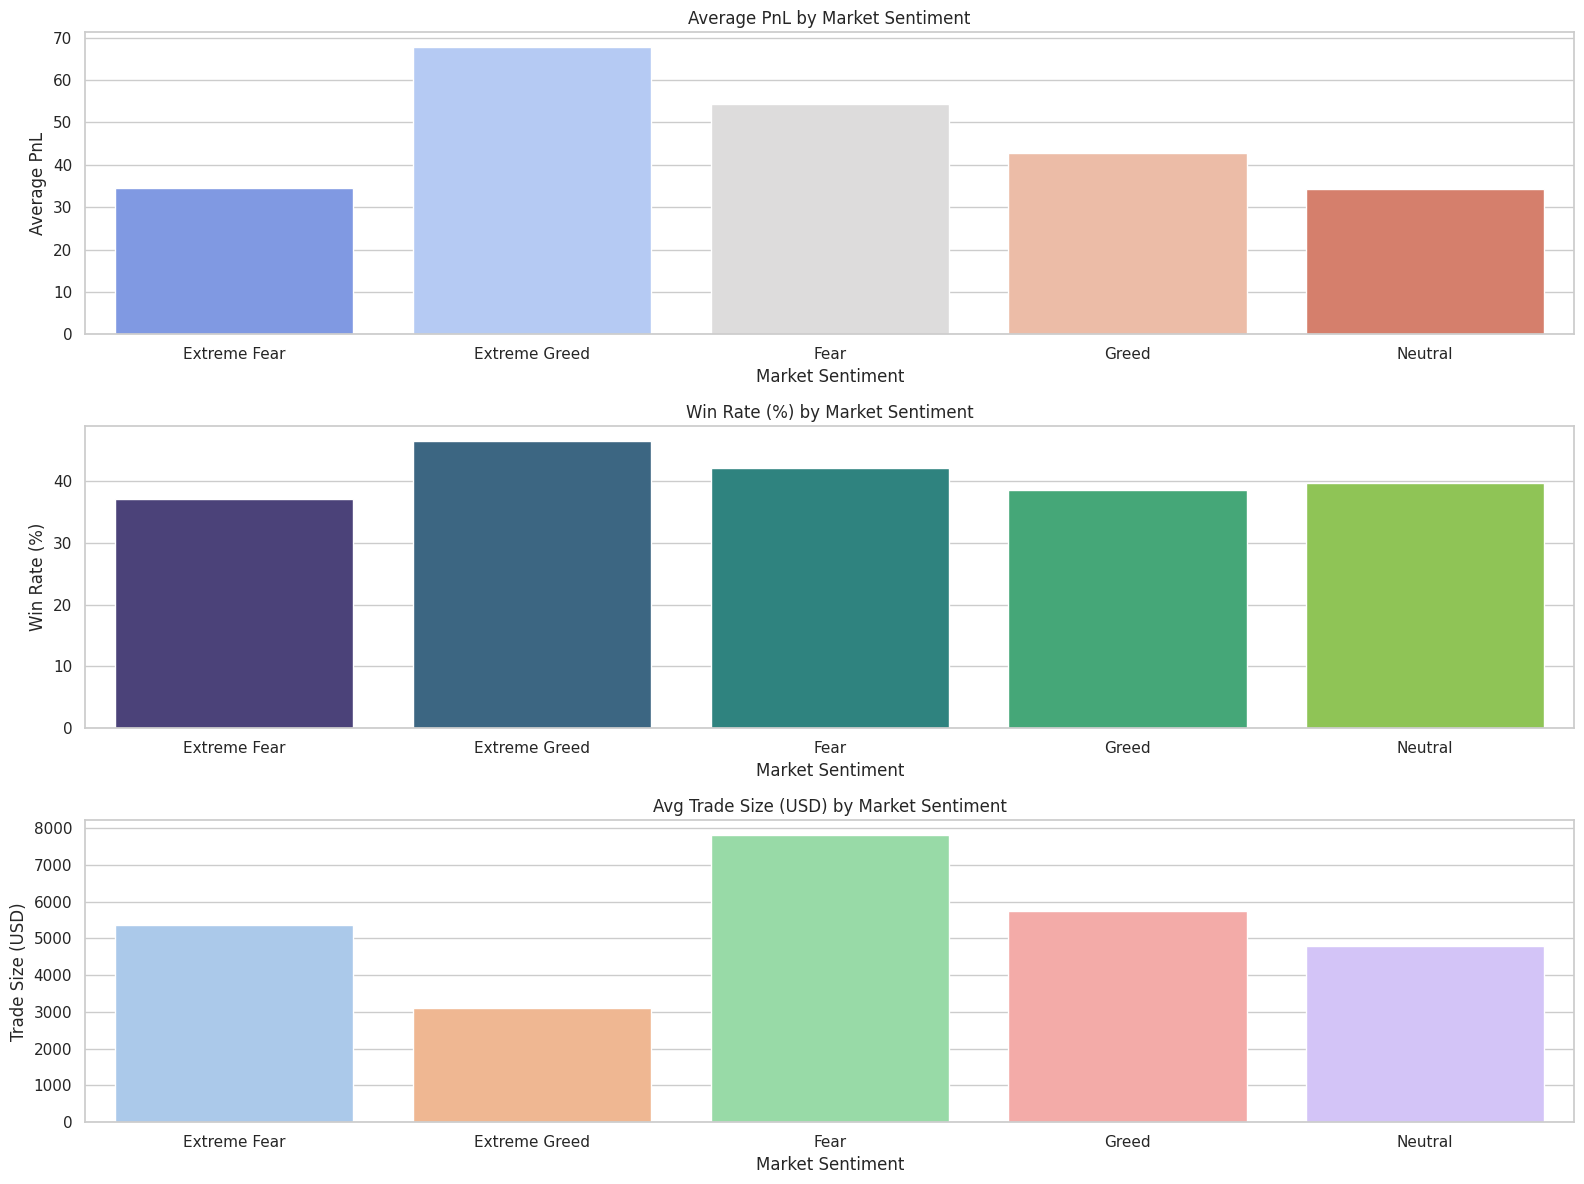

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Chart 1: Average PnL by Market Sentiment
plt.subplot(3, 1, 1)
sns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')
plt.title('Average PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average PnL')

# Chart 2: Win Rate (%) by Market Sentiment
plt.subplot(3, 1, 2)
sns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')
plt.title('Win Rate (%) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate (%)')

# Chart 3: Average Trade Size by Sentiment
plt.subplot(3, 1, 3)
sns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')
plt.title('Avg Trade Size (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')

plt.tight_layout()
plt.show()
